In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm
sns.set_style('darkgrid')
%matplotlib inline
mpl.rcParams['figure.figsize'] = (20,5)

In [2]:
df = pd.read_csv('ai_chat_plugin_survey.csv')
df.head()

,Timestamp,How old are you?,What is your gender?,What is your primary language?,Country,City,State/Province,What devices do you use regularly at work? Select all that apply,Use Iphone?,Use Mac?,...,Use Snapchat?,Use Google Meet?,What is your job role?,Job Role Categories,How long have you worked in your current role?,Approximately how many of your co-workers do you correspond with regularly?,Communication with my co-workers is generally…,The company culture is...,My co-workers are generally...,"Would you be open to participating in follow-up research, such as usability testing? If so, please leave your email address here."
0,10/12/2023 13:37:31,35-39,Female,English,United States of America,Huntington Station,New York,"iPhone, Mac",Yes,Yes,...,No,No,Product Designer,Design and Development,7-12 months,25-30,Positive,Positive,Respectful,Bernadettecolavito@gmail.com
1,10/12/2023 13:58:46,25-29,Female,English,United States of America,Sunnyvale,California,"iPhone, Android, PC",Yes,No,...,No,No,Product Designer,Design and Development,13 months - 2 years,5,Positive,Positive,Very respectful,ayushisuhane789@gmail.com
2,10/12/2023 17:25:21,30-34,Female,Hindi,India,NaN,NaN,"Android, PC",No,No,...,No,No,UX Designer,Design and Development,7-12 months,15-20 (maybe more if team meetings count),Positive,Very positive,Very respectful,Yes. ar.pragyasrivastava@gmail.com
3,10/12/2023 20:01:57,25-29,Male,English,Canada,Halifax,Nova Scotia,Android,No,No,...,No,No,Data Analyst,Data and Analytics,Less than 3 months,0,Neither positive nor negative,Neither positive nor negative,Neither respectful nor disrespectful,NaN
4,10/12/2023 20:48:11,30-34,Male,English,United States of America,San Jose,California,"iPhone, Mac",Yes,Yes,...,No,No,IOS Developer,Design and Development,7-12 months,10-29,Neither positive nor negative,Negative,Respectful,NaN


In [3]:
# Replace spaces with underscores and convert to lowercase
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.head()

,timestamp,how_old_are_you?,what_is_your_gender?,what_is_your_primary_language?,country,city,state/province,what_devices_do_you_use_regularly_at_work?_select_all_that_apply,use_iphone?,use_mac?,...,use_snapchat?,use_google_meet?,what_is_your_job_role?,job_role_categories,how_long_have_you_worked_in_your_current_role?,approximately_how_many_of_your_co-workers_do_you_correspond_with_regularly?,communication_with_my_co-workers_is_generally…,the_company_culture_is...,my_co-workers_are_generally...,"would_you_be_open_to_participating_in_follow-up_research,_such_as_usability_testing?_if_so,_please_leave_your_email_address_here."
0,10/12/2023 13:37:31,35-39,Female,English,United States of America,Huntington Station,New York,"iPhone, Mac",Yes,Yes,...,No,No,Product Designer,Design and Development,7-12 months,25-30,Positive,Positive,Respectful,Bernadettecolavito@gmail.com
1,10/12/2023 13:58:46,25-29,Female,English,United States of America,Sunnyvale,California,"iPhone, Android, PC",Yes,No,...,No,No,Product Designer,Design and Development,13 months - 2 years,5,Positive,Positive,Very respectful,ayushisuhane789@gmail.com
2,10/12/2023 17:25:21,30-34,Female,Hindi,India,NaN,NaN,"Android, PC",No,No,...,No,No,UX Designer,Design and Development,7-12 months,15-20 (maybe more if team meetings count),Positive,Very positive,Very respectful,Yes. ar.pragyasrivastava@gmail.com
3,10/12/2023 20:01:57,25-29,Male,English,Canada,Halifax,Nova Scotia,Android,No,No,...,No,No,Data Analyst,Data and Analytics,Less than 3 months,0,Neither positive nor negative,Neither positive nor negative,Neither respectful nor disrespectful,NaN
4,10/12/2023 20:48:11,30-34,Male,English,United States of America,San Jose,California,"iPhone, Mac",Yes,Yes,...,No,No,IOS Developer,Design and Development,7-12 months,10-29,Neither positive nor negative,Negative,Respectful,NaN


In [4]:
# Replace 'Yes' with 1 and 'No' with 0
df.replace({'Yes': 1, 'No': 0}, inplace=True)
df.head()

,timestamp,how_old_are_you?,what_is_your_gender?,what_is_your_primary_language?,country,city,state/province,what_devices_do_you_use_regularly_at_work?_select_all_that_apply,use_iphone?,use_mac?,...,use_snapchat?,use_google_meet?,what_is_your_job_role?,job_role_categories,how_long_have_you_worked_in_your_current_role?,approximately_how_many_of_your_co-workers_do_you_correspond_with_regularly?,communication_with_my_co-workers_is_generally…,the_company_culture_is...,my_co-workers_are_generally...,"would_you_be_open_to_participating_in_follow-up_research,_such_as_usability_testing?_if_so,_please_leave_your_email_address_here."
0,10/12/2023 13:37:31,35-39,Female,English,United States of America,Huntington Station,New York,"iPhone, Mac",1,1,...,0,0,Product Designer,Design and Development,7-12 months,25-30,Positive,Positive,Respectful,Bernadettecolavito@gmail.com
1,10/12/2023 13:58:46,25-29,Female,English,United States of America,Sunnyvale,California,"iPhone, Android, PC",1,0,...,0,0,Product Designer,Design and Development,13 months - 2 years,5,Positive,Positive,Very respectful,ayushisuhane789@gmail.com
2,10/12/2023 17:25:21,30-34,Female,Hindi,India,NaN,NaN,"Android, PC",0,0,...,0,0,UX Designer,Design and Development,7-12 months,15-20 (maybe more if team meetings count),Positive,Very positive,Very respectful,Yes. ar.pragyasrivastava@gmail.com
3,10/12/2023 20:01:57,25-29,Male,English,Canada,Halifax,Nova Scotia,Android,0,0,...,0,0,Data Analyst,Data and Analytics,Less than 3 months,0,Neither positive nor negative,Neither positive nor negative,Neither respectful nor disrespectful,NaN
4,10/12/2023 20:48:11,30-34,Male,English,United States of America,San Jose,California,"iPhone, Mac",1,1,...,0,0,IOS Developer,Design and Development,7-12 months,10-29,Neither positive nor negative,Negative,Respectful,NaN


In [5]:
# Define a mapping for gender
gender_mapping = {'Male': 1, 'Female': 0}

# Replace 'Male' and 'Female' with 1 and 0, respectively
# Replace anything else with 2 (indicating unknown or non-binary gender)
df['what_is_your_gender?'] = df['what_is_your_gender?'].map(gender_mapping).fillna(2).astype(int)
df.head()

,timestamp,how_old_are_you?,what_is_your_gender?,what_is_your_primary_language?,country,city,state/province,what_devices_do_you_use_regularly_at_work?_select_all_that_apply,use_iphone?,use_mac?,...,use_snapchat?,use_google_meet?,what_is_your_job_role?,job_role_categories,how_long_have_you_worked_in_your_current_role?,approximately_how_many_of_your_co-workers_do_you_correspond_with_regularly?,communication_with_my_co-workers_is_generally…,the_company_culture_is...,my_co-workers_are_generally...,"would_you_be_open_to_participating_in_follow-up_research,_such_as_usability_testing?_if_so,_please_leave_your_email_address_here."
0,10/12/2023 13:37:31,35-39,0,English,United States of America,Huntington Station,New York,"iPhone, Mac",1,1,...,0,0,Product Designer,Design and Development,7-12 months,25-30,Positive,Positive,Respectful,Bernadettecolavito@gmail.com
1,10/12/2023 13:58:46,25-29,0,English,United States of America,Sunnyvale,California,"iPhone, Android, PC",1,0,...,0,0,Product Designer,Design and Development,13 months - 2 years,5,Positive,Positive,Very respectful,ayushisuhane789@gmail.com
2,10/12/2023 17:25:21,30-34,0,Hindi,India,NaN,NaN,"Android, PC",0,0,...,0,0,UX Designer,Design and Development,7-12 months,15-20 (maybe more if team meetings count),Positive,Very positive,Very respectful,Yes. ar.pragyasrivastava@gmail.com
3,10/12/2023 20:01:57,25-29,1,English,Canada,Halifax,Nova Scotia,Android,0,0,...,0,0,Data Analyst,Data and Analytics,Less than 3 months,0,Neither positive nor negative,Neither positive nor negative,Neither respectful nor disrespectful,NaN
4,10/12/2023 20:48:11,30-34,1,English,United States of America,San Jose,California,"iPhone, Mac",1,1,...,0,0,IOS Developer,Design and Development,7-12 months,10-29,Neither positive nor negative,Negative,Respectful,NaN


In [6]:
# Display unique values in the 'how_old_are_you?' column
unique_values = df['how_old_are_you?'].unique()
print("Unique values in 'how_old_are_you?' column:")
print(unique_values)

Unique values in 'how_old_are_you?' column:
['35-39' '25-29' '30-34' '40-44' '18-24' '45-49' '50+']


In [7]:
# Define a mapping for age groups to integers
age_mapping = {
    '18-24': 1,
    '25-29': 2,
    '30-34': 3,
    '35-39': 4,
    '40-44': 5,
    '45-49': 6,
    '50+': 7
}

# Replace age groups with integers using the defined mapping
df['how_old_are_you?'] = df['how_old_are_you?'].map(age_mapping)
df.head()

,timestamp,how_old_are_you?,what_is_your_gender?,what_is_your_primary_language?,country,city,state/province,what_devices_do_you_use_regularly_at_work?_select_all_that_apply,use_iphone?,use_mac?,...,use_snapchat?,use_google_meet?,what_is_your_job_role?,job_role_categories,how_long_have_you_worked_in_your_current_role?,approximately_how_many_of_your_co-workers_do_you_correspond_with_regularly?,communication_with_my_co-workers_is_generally…,the_company_culture_is...,my_co-workers_are_generally...,"would_you_be_open_to_participating_in_follow-up_research,_such_as_usability_testing?_if_so,_please_leave_your_email_address_here."
0,10/12/2023 13:37:31,4,0,English,United States of America,Huntington Station,New York,"iPhone, Mac",1,1,...,0,0,Product Designer,Design and Development,7-12 months,25-30,Positive,Positive,Respectful,Bernadettecolavito@gmail.com
1,10/12/2023 13:58:46,2,0,English,United States of America,Sunnyvale,California,"iPhone, Android, PC",1,0,...,0,0,Product Designer,Design and Development,13 months - 2 years,5,Positive,Positive,Very respectful,ayushisuhane789@gmail.com
2,10/12/2023 17:25:21,3,0,Hindi,India,NaN,NaN,"Android, PC",0,0,...,0,0,UX Designer,Design and Development,7-12 months,15-20 (maybe more if team meetings count),Positive,Very positive,Very respectful,Yes. ar.pragyasrivastava@gmail.com
3,10/12/2023 20:01:57,2,1,English,Canada,Halifax,Nova Scotia,Android,0,0,...,0,0,Data Analyst,Data and Analytics,Less than 3 months,0,Neither positive nor negative,Neither positive nor negative,Neither respectful nor disrespectful,NaN
4,10/12/2023 20:48:11,3,1,English,United States of America,San Jose,California,"iPhone, Mac",1,1,...,0,0,IOS Developer,Design and Development,7-12 months,10-29,Neither positive nor negative,Negative,Respectful,NaN


In [8]:
# Display unique values in the 'how_old_are_you?' column
unique_values = df['how_old_are_you?'].unique()
print("Unique values in 'how_old_are_you?' column:")
print(unique_values)

Unique values in 'how_old_are_you?' column:
[4 2 3 5 1 6 7]


In [9]:
# Get unique values in the 'what_is_your_primary_language?' column
unique_languages = df['what_is_your_primary_language?'].unique()

# Display unique values
print("Unique values in 'what_is_your_primary_language?' column:")
print(unique_languages)

Unique values in 'what_is_your_primary_language?' column:
['English' 'Hindi' 'Turkish' 'French' nan 'Urdu' 'Vietnamese' 'Korean']


In [10]:
# Define a mapping for languages to integers
language_mapping = {
    'English': 1,
    'Hindi': 2,
    'Turkish': 3,
    'French': 4,
    'Urdu': 5,
    'Vietnamese': 6,
    'Korean': 7,
    # Add a default value for unmatched cases
    'other': 0
}

# Replace languages with integers using the defined mapping
df['what_is_your_primary_language?'] = df['what_is_your_primary_language?'].map(language_mapping).fillna(0).astype(int)
df.head()

,timestamp,how_old_are_you?,what_is_your_gender?,what_is_your_primary_language?,country,city,state/province,what_devices_do_you_use_regularly_at_work?_select_all_that_apply,use_iphone?,use_mac?,...,use_snapchat?,use_google_meet?,what_is_your_job_role?,job_role_categories,how_long_have_you_worked_in_your_current_role?,approximately_how_many_of_your_co-workers_do_you_correspond_with_regularly?,communication_with_my_co-workers_is_generally…,the_company_culture_is...,my_co-workers_are_generally...,"would_you_be_open_to_participating_in_follow-up_research,_such_as_usability_testing?_if_so,_please_leave_your_email_address_here."
0,10/12/2023 13:37:31,4,0,1,United States of America,Huntington Station,New York,"iPhone, Mac",1,1,...,0,0,Product Designer,Design and Development,7-12 months,25-30,Positive,Positive,Respectful,Bernadettecolavito@gmail.com
1,10/12/2023 13:58:46,2,0,1,United States of America,Sunnyvale,California,"iPhone, Android, PC",1,0,...,0,0,Product Designer,Design and Development,13 months - 2 years,5,Positive,Positive,Very respectful,ayushisuhane789@gmail.com
2,10/12/2023 17:25:21,3,0,2,India,NaN,NaN,"Android, PC",0,0,...,0,0,UX Designer,Design and Development,7-12 months,15-20 (maybe more if team meetings count),Positive,Very positive,Very respectful,Yes. ar.pragyasrivastava@gmail.com
3,10/12/2023 20:01:57,2,1,1,Canada,Halifax,Nova Scotia,Android,0,0,...,0,0,Data Analyst,Data and Analytics,Less than 3 months,0,Neither positive nor negative,Neither positive nor negative,Neither respectful nor disrespectful,NaN
4,10/12/2023 20:48:11,3,1,1,United States of America,San Jose,California,"iPhone, Mac",1,1,...,0,0,IOS Developer,Design and Development,7-12 months,10-29,Neither positive nor negative,Negative,Respectful,NaN


In [11]:
# Get unique values in the 'what_is_your_primary_language?' column
unique_languages = df['what_is_your_primary_language?'].unique()

# Display unique values
print("Unique values in 'what_is_your_primary_language?' column:")
print(unique_languages)

Unique values in 'what_is_your_primary_language?' column:
[1 2 3 4 0 5 6 7]


In [12]:
# Get unique values in the 'country' column
unique_countries = df['country'].unique()

# Display unique values
print("Unique values in 'country' column:")
print(unique_countries)

Unique values in 'country' column:
['United States of America' 'India' 'Canada' 'United States of America '
 'Japan' 'India ' 'Armenia' 'Iran' 'South Korea']


In [13]:
# Remove trailing space from 'United States of America'
df['country'] = df['country'].str.strip()
df.head()

,timestamp,how_old_are_you?,what_is_your_gender?,what_is_your_primary_language?,country,city,state/province,what_devices_do_you_use_regularly_at_work?_select_all_that_apply,use_iphone?,use_mac?,...,use_snapchat?,use_google_meet?,what_is_your_job_role?,job_role_categories,how_long_have_you_worked_in_your_current_role?,approximately_how_many_of_your_co-workers_do_you_correspond_with_regularly?,communication_with_my_co-workers_is_generally…,the_company_culture_is...,my_co-workers_are_generally...,"would_you_be_open_to_participating_in_follow-up_research,_such_as_usability_testing?_if_so,_please_leave_your_email_address_here."
0,10/12/2023 13:37:31,4,0,1,United States of America,Huntington Station,New York,"iPhone, Mac",1,1,...,0,0,Product Designer,Design and Development,7-12 months,25-30,Positive,Positive,Respectful,Bernadettecolavito@gmail.com
1,10/12/2023 13:58:46,2,0,1,United States of America,Sunnyvale,California,"iPhone, Android, PC",1,0,...,0,0,Product Designer,Design and Development,13 months - 2 years,5,Positive,Positive,Very respectful,ayushisuhane789@gmail.com
2,10/12/2023 17:25:21,3,0,2,India,NaN,NaN,"Android, PC",0,0,...,0,0,UX Designer,Design and Development,7-12 months,15-20 (maybe more if team meetings count),Positive,Very positive,Very respectful,Yes. ar.pragyasrivastava@gmail.com
3,10/12/2023 20:01:57,2,1,1,Canada,Halifax,Nova Scotia,Android,0,0,...,0,0,Data Analyst,Data and Analytics,Less than 3 months,0,Neither positive nor negative,Neither positive nor negative,Neither respectful nor disrespectful,NaN
4,10/12/2023 20:48:11,3,1,1,United States of America,San Jose,California,"iPhone, Mac",1,1,...,0,0,IOS Developer,Design and Development,7-12 months,10-29,Neither positive nor negative,Negative,Respectful,NaN


In [14]:
# Define a mapping for countries to integers
country_mapping = {
    'United States of America': 1,
    'India': 2,
    'Canada': 3,
    'Japan': 4,
    'Armenia': 5,
    'Iran': 6,
    'South Korea': 7,
    # Add a default value for unmatched cases
    'other': 0
}

# Replace countries with integers using the defined mapping
df['country'] = df['country'].map(country_mapping).fillna(0).astype(int)
df.head()

,timestamp,how_old_are_you?,what_is_your_gender?,what_is_your_primary_language?,country,city,state/province,what_devices_do_you_use_regularly_at_work?_select_all_that_apply,use_iphone?,use_mac?,...,use_snapchat?,use_google_meet?,what_is_your_job_role?,job_role_categories,how_long_have_you_worked_in_your_current_role?,approximately_how_many_of_your_co-workers_do_you_correspond_with_regularly?,communication_with_my_co-workers_is_generally…,the_company_culture_is...,my_co-workers_are_generally...,"would_you_be_open_to_participating_in_follow-up_research,_such_as_usability_testing?_if_so,_please_leave_your_email_address_here."
0,10/12/2023 13:37:31,4,0,1,1,Huntington Station,New York,"iPhone, Mac",1,1,...,0,0,Product Designer,Design and Development,7-12 months,25-30,Positive,Positive,Respectful,Bernadettecolavito@gmail.com
1,10/12/2023 13:58:46,2,0,1,1,Sunnyvale,California,"iPhone, Android, PC",1,0,...,0,0,Product Designer,Design and Development,13 months - 2 years,5,Positive,Positive,Very respectful,ayushisuhane789@gmail.com
2,10/12/2023 17:25:21,3,0,2,2,NaN,NaN,"Android, PC",0,0,...,0,0,UX Designer,Design and Development,7-12 months,15-20 (maybe more if team meetings count),Positive,Very positive,Very respectful,Yes. ar.pragyasrivastava@gmail.com
3,10/12/2023 20:01:57,2,1,1,3,Halifax,Nova Scotia,Android,0,0,...,0,0,Data Analyst,Data and Analytics,Less than 3 months,0,Neither positive nor negative,Neither positive nor negative,Neither respectful nor disrespectful,NaN
4,10/12/2023 20:48:11,3,1,1,1,San Jose,California,"iPhone, Mac",1,1,...,0,0,IOS Developer,Design and Development,7-12 months,10-29,Neither positive nor negative,Negative,Respectful,NaN


In [15]:
# Remove leading and trailing spaces from the 'state/province' column
df['state/province'] = df['state/province'].str.strip()
df.head()

,timestamp,how_old_are_you?,what_is_your_gender?,what_is_your_primary_language?,country,city,state/province,what_devices_do_you_use_regularly_at_work?_select_all_that_apply,use_iphone?,use_mac?,...,use_snapchat?,use_google_meet?,what_is_your_job_role?,job_role_categories,how_long_have_you_worked_in_your_current_role?,approximately_how_many_of_your_co-workers_do_you_correspond_with_regularly?,communication_with_my_co-workers_is_generally…,the_company_culture_is...,my_co-workers_are_generally...,"would_you_be_open_to_participating_in_follow-up_research,_such_as_usability_testing?_if_so,_please_leave_your_email_address_here."
0,10/12/2023 13:37:31,4,0,1,1,Huntington Station,New York,"iPhone, Mac",1,1,...,0,0,Product Designer,Design and Development,7-12 months,25-30,Positive,Positive,Respectful,Bernadettecolavito@gmail.com
1,10/12/2023 13:58:46,2,0,1,1,Sunnyvale,California,"iPhone, Android, PC",1,0,...,0,0,Product Designer,Design and Development,13 months - 2 years,5,Positive,Positive,Very respectful,ayushisuhane789@gmail.com
2,10/12/2023 17:25:21,3,0,2,2,NaN,NaN,"Android, PC",0,0,...,0,0,UX Designer,Design and Development,7-12 months,15-20 (maybe more if team meetings count),Positive,Very positive,Very respectful,Yes. ar.pragyasrivastava@gmail.com
3,10/12/2023 20:01:57,2,1,1,3,Halifax,Nova Scotia,Android,0,0,...,0,0,Data Analyst,Data and Analytics,Less than 3 months,0,Neither positive nor negative,Neither positive nor negative,Neither respectful nor disrespectful,NaN
4,10/12/2023 20:48:11,3,1,1,1,San Jose,California,"iPhone, Mac",1,1,...,0,0,IOS Developer,Design and Development,7-12 months,10-29,Neither positive nor negative,Negative,Respectful,NaN


In [16]:
# Get unique values in the 'state/province' column
unique_states_provinces = df['state/province'].unique()

# Display unique values
print("Unique values in 'state/province' column:")
print(unique_states_provinces)

Unique values in 'state/province' column:
['New York' 'California' nan 'Nova Scotia' 'Oregon' 'New Jersey' 'Ontario'
 'India' 'Yerevan' 'Massachusetts' 'Washington' 'Maryland' 'Colorado'
 'British Columbia' 'Markazi' 'Pennsylvania' 'Texas' 'Michigan' 'Florida'
 'Georgia']


In [17]:
# Define a mapping for state/province to integers
state_province_mapping = {
    'New York': 1,
    'California': 2,
    'Nova Scotia': 3,
    'Oregon': 4,
    'New Jersey': 5,
    'Ontario': 6,
    'India': 7,
    'Yerevan': 8,
    'Massachusetts': 9,
    'Washington': 10,
    'Maryland': 11,
    'Colorado': 12,
    'British Columbia': 13,
    'Markazi': 14,
    'Pennsylvania': 15,
    'Texas': 16,
    'Michigan': 17,
    'Florida': 18,
    'Georgia': 19,
    # Add a default value for unmatched cases
    'other': 0
}

# Replace state/province with integers using the defined mapping
df['state/province'] = df['state/province'].map(state_province_mapping).fillna(0).astype(int)
df.head()

,timestamp,how_old_are_you?,what_is_your_gender?,what_is_your_primary_language?,country,city,state/province,what_devices_do_you_use_regularly_at_work?_select_all_that_apply,use_iphone?,use_mac?,...,use_snapchat?,use_google_meet?,what_is_your_job_role?,job_role_categories,how_long_have_you_worked_in_your_current_role?,approximately_how_many_of_your_co-workers_do_you_correspond_with_regularly?,communication_with_my_co-workers_is_generally…,the_company_culture_is...,my_co-workers_are_generally...,"would_you_be_open_to_participating_in_follow-up_research,_such_as_usability_testing?_if_so,_please_leave_your_email_address_here."
0,10/12/2023 13:37:31,4,0,1,1,Huntington Station,1,"iPhone, Mac",1,1,...,0,0,Product Designer,Design and Development,7-12 months,25-30,Positive,Positive,Respectful,Bernadettecolavito@gmail.com
1,10/12/2023 13:58:46,2,0,1,1,Sunnyvale,2,"iPhone, Android, PC",1,0,...,0,0,Product Designer,Design and Development,13 months - 2 years,5,Positive,Positive,Very respectful,ayushisuhane789@gmail.com
2,10/12/2023 17:25:21,3,0,2,2,NaN,0,"Android, PC",0,0,...,0,0,UX Designer,Design and Development,7-12 months,15-20 (maybe more if team meetings count),Positive,Very positive,Very respectful,Yes. ar.pragyasrivastava@gmail.com
3,10/12/2023 20:01:57,2,1,1,3,Halifax,3,Android,0,0,...,0,0,Data Analyst,Data and Analytics,Less than 3 months,0,Neither positive nor negative,Neither positive nor negative,Neither respectful nor disrespectful,NaN
4,10/12/2023 20:48:11,3,1,1,1,San Jose,2,"iPhone, Mac",1,1,...,0,0,IOS Developer,Design and Development,7-12 months,10-29,Neither positive nor negative,Negative,Respectful,NaN


In [18]:
# Get unique values in the 'job_role_categories' column
unique_job_roles = df['job_role_categories'].unique()

# Display unique values
print("Unique values in 'job_role_categories' column:")
print(unique_job_roles)

Unique values in 'job_role_categories' column:
['Design and Development' 'Data and Analytics' 'Engineering and Technical'
 'Education and Teaching' 'Content and Writing' 'Unknown' 'Other']


In [19]:
# Define a mapping for job role categories to integers
job_role_mapping = {
    'Design and Development': 1,
    'Data and Analytics': 2,
    'Engineering and Technical': 3,
    'Education and Teaching': 4,
    'Content and Writing': 5,
    'Unknown': 6,
    'Other': 7,
    # Add a default value for unmatched cases
    'other': 0
}

# Replace job role categories with integers using the defined mapping
df['job_role_categories'] = df['job_role_categories'].map(job_role_mapping).fillna(0).astype(int)
df.head()

,timestamp,how_old_are_you?,what_is_your_gender?,what_is_your_primary_language?,country,city,state/province,what_devices_do_you_use_regularly_at_work?_select_all_that_apply,use_iphone?,use_mac?,...,use_snapchat?,use_google_meet?,what_is_your_job_role?,job_role_categories,how_long_have_you_worked_in_your_current_role?,approximately_how_many_of_your_co-workers_do_you_correspond_with_regularly?,communication_with_my_co-workers_is_generally…,the_company_culture_is...,my_co-workers_are_generally...,"would_you_be_open_to_participating_in_follow-up_research,_such_as_usability_testing?_if_so,_please_leave_your_email_address_here."
0,10/12/2023 13:37:31,4,0,1,1,Huntington Station,1,"iPhone, Mac",1,1,...,0,0,Product Designer,1,7-12 months,25-30,Positive,Positive,Respectful,Bernadettecolavito@gmail.com
1,10/12/2023 13:58:46,2,0,1,1,Sunnyvale,2,"iPhone, Android, PC",1,0,...,0,0,Product Designer,1,13 months - 2 years,5,Positive,Positive,Very respectful,ayushisuhane789@gmail.com
2,10/12/2023 17:25:21,3,0,2,2,NaN,0,"Android, PC",0,0,...,0,0,UX Designer,1,7-12 months,15-20 (maybe more if team meetings count),Positive,Very positive,Very respectful,Yes. ar.pragyasrivastava@gmail.com
3,10/12/2023 20:01:57,2,1,1,3,Halifax,3,Android,0,0,...,0,0,Data Analyst,2,Less than 3 months,0,Neither positive nor negative,Neither positive nor negative,Neither respectful nor disrespectful,NaN
4,10/12/2023 20:48:11,3,1,1,1,San Jose,2,"iPhone, Mac",1,1,...,0,0,IOS Developer,1,7-12 months,10-29,Neither positive nor negative,Negative,Respectful,NaN


In [20]:
# Get unique values in the 'how_long_have_you_worked_in_your_current_role?' column
unique_work_experience = df['how_long_have_you_worked_in_your_current_role?'].unique()

# Display unique values
print("Unique values in 'how_long_have_you_worked_in_your_current_role?' column:")
print(unique_work_experience)

Unique values in 'how_long_have_you_worked_in_your_current_role?' column:
['7-12 months' '13 months - 2 years' 'Less than 3 months'
 'More than 2 years' '3-6 months' nan]


In [21]:
# Define a mapping for work experience to integers
work_experience_mapping = {
    'Less than 3 months': 1,
    '3-6 months': 2,
    '7-12 months': 3,
    '13 months - 2 years': 4,
    'More than 2 years': 5,
    # Add a default value for unmatched cases
    'other': 0
}

# Replace work experience with integers using the defined mapping
df['how_long_have_you_worked_in_your_current_role?'] = df['how_long_have_you_worked_in_your_current_role?'].map(work_experience_mapping).fillna(0).astype(int)
df.head()

,timestamp,how_old_are_you?,what_is_your_gender?,what_is_your_primary_language?,country,city,state/province,what_devices_do_you_use_regularly_at_work?_select_all_that_apply,use_iphone?,use_mac?,...,use_snapchat?,use_google_meet?,what_is_your_job_role?,job_role_categories,how_long_have_you_worked_in_your_current_role?,approximately_how_many_of_your_co-workers_do_you_correspond_with_regularly?,communication_with_my_co-workers_is_generally…,the_company_culture_is...,my_co-workers_are_generally...,"would_you_be_open_to_participating_in_follow-up_research,_such_as_usability_testing?_if_so,_please_leave_your_email_address_here."
0,10/12/2023 13:37:31,4,0,1,1,Huntington Station,1,"iPhone, Mac",1,1,...,0,0,Product Designer,1,3,25-30,Positive,Positive,Respectful,Bernadettecolavito@gmail.com
1,10/12/2023 13:58:46,2,0,1,1,Sunnyvale,2,"iPhone, Android, PC",1,0,...,0,0,Product Designer,1,4,5,Positive,Positive,Very respectful,ayushisuhane789@gmail.com
2,10/12/2023 17:25:21,3,0,2,2,NaN,0,"Android, PC",0,0,...,0,0,UX Designer,1,3,15-20 (maybe more if team meetings count),Positive,Very positive,Very respectful,Yes. ar.pragyasrivastava@gmail.com
3,10/12/2023 20:01:57,2,1,1,3,Halifax,3,Android,0,0,...,0,0,Data Analyst,2,1,0,Neither positive nor negative,Neither positive nor negative,Neither respectful nor disrespectful,NaN
4,10/12/2023 20:48:11,3,1,1,1,San Jose,2,"iPhone, Mac",1,1,...,0,0,IOS Developer,1,3,10-29,Neither positive nor negative,Negative,Respectful,NaN


In [22]:
# Get unique values in the 'communication_with_my_co-workers_is_generally...' column
unique_communication = df['communication_with_my_co-workers_is_generally…'].unique()

# Display unique values
print("Unique values in 'communication_with_my_co-workers_is_generally…' column:")
print(unique_communication)

Unique values in 'communication_with_my_co-workers_is_generally…' column:
['Positive' 'Neither positive nor negative' 'Very positive' nan]


In [23]:
# Define a mapping for communication sentiment to integers
communication_mapping = {
    'Positive': 1,
    'Very positive': 2,
    'Neither positive nor negative': 0,
    # Add a default value for unmatched cases
    'other': -1
}

# Replace communication sentiment with integers using the defined mapping
df['communication_with_my_co-workers_is_generally…'] = df['communication_with_my_co-workers_is_generally…'].map(communication_mapping).fillna(-1).astype(int)
df.head()

,timestamp,how_old_are_you?,what_is_your_gender?,what_is_your_primary_language?,country,city,state/province,what_devices_do_you_use_regularly_at_work?_select_all_that_apply,use_iphone?,use_mac?,...,use_snapchat?,use_google_meet?,what_is_your_job_role?,job_role_categories,how_long_have_you_worked_in_your_current_role?,approximately_how_many_of_your_co-workers_do_you_correspond_with_regularly?,communication_with_my_co-workers_is_generally…,the_company_culture_is...,my_co-workers_are_generally...,"would_you_be_open_to_participating_in_follow-up_research,_such_as_usability_testing?_if_so,_please_leave_your_email_address_here."
0,10/12/2023 13:37:31,4,0,1,1,Huntington Station,1,"iPhone, Mac",1,1,...,0,0,Product Designer,1,3,25-30,1,Positive,Respectful,Bernadettecolavito@gmail.com
1,10/12/2023 13:58:46,2,0,1,1,Sunnyvale,2,"iPhone, Android, PC",1,0,...,0,0,Product Designer,1,4,5,1,Positive,Very respectful,ayushisuhane789@gmail.com
2,10/12/2023 17:25:21,3,0,2,2,NaN,0,"Android, PC",0,0,...,0,0,UX Designer,1,3,15-20 (maybe more if team meetings count),1,Very positive,Very respectful,Yes. ar.pragyasrivastava@gmail.com
3,10/12/2023 20:01:57,2,1,1,3,Halifax,3,Android,0,0,...,0,0,Data Analyst,2,1,0,0,Neither positive nor negative,Neither respectful nor disrespectful,NaN
4,10/12/2023 20:48:11,3,1,1,1,San Jose,2,"iPhone, Mac",1,1,...,0,0,IOS Developer,1,3,10-29,0,Negative,Respectful,NaN


In [24]:
# Get unique values in the 'the_company_culture_is...' column
unique_company_culture = df['the_company_culture_is...'].unique()

# Display unique values
print("Unique values in 'the_company_culture_is...' column:")
print(unique_company_culture)

Unique values in 'the_company_culture_is...' column:
['Positive' 'Very positive' 'Neither positive nor negative' 'Negative' nan]


In [25]:
# Define a mapping for company culture sentiment to integers
company_culture_mapping = {
    'Positive': 1,
    'Very positive': 2,
    'Neither positive nor negative': 0,
    'Negative': -1,
    # Add a default value for unmatched cases
    'other': -2
}

# Replace company culture sentiment with integers using the defined mapping
df['the_company_culture_is...'] = df['the_company_culture_is...'].map(company_culture_mapping).fillna(-2).astype(int)
df.head()

,timestamp,how_old_are_you?,what_is_your_gender?,what_is_your_primary_language?,country,city,state/province,what_devices_do_you_use_regularly_at_work?_select_all_that_apply,use_iphone?,use_mac?,...,use_snapchat?,use_google_meet?,what_is_your_job_role?,job_role_categories,how_long_have_you_worked_in_your_current_role?,approximately_how_many_of_your_co-workers_do_you_correspond_with_regularly?,communication_with_my_co-workers_is_generally…,the_company_culture_is...,my_co-workers_are_generally...,"would_you_be_open_to_participating_in_follow-up_research,_such_as_usability_testing?_if_so,_please_leave_your_email_address_here."
0,10/12/2023 13:37:31,4,0,1,1,Huntington Station,1,"iPhone, Mac",1,1,...,0,0,Product Designer,1,3,25-30,1,1,Respectful,Bernadettecolavito@gmail.com
1,10/12/2023 13:58:46,2,0,1,1,Sunnyvale,2,"iPhone, Android, PC",1,0,...,0,0,Product Designer,1,4,5,1,1,Very respectful,ayushisuhane789@gmail.com
2,10/12/2023 17:25:21,3,0,2,2,NaN,0,"Android, PC",0,0,...,0,0,UX Designer,1,3,15-20 (maybe more if team meetings count),1,2,Very respectful,Yes. ar.pragyasrivastava@gmail.com
3,10/12/2023 20:01:57,2,1,1,3,Halifax,3,Android,0,0,...,0,0,Data Analyst,2,1,0,0,0,Neither respectful nor disrespectful,NaN
4,10/12/2023 20:48:11,3,1,1,1,San Jose,2,"iPhone, Mac",1,1,...,0,0,IOS Developer,1,3,10-29,0,-1,Respectful,NaN


In [26]:
# Get unique values in the 'my_co-workers_are_generally...' column
unique_my_coworkers = df['my_co-workers_are_generally...'].unique()

# Display unique values
print("Unique values in 'my_co-workers_are_generally...' column:")
print(unique_my_coworkers)

Unique values in 'my_co-workers_are_generally...' column:
['Respectful' 'Very respectful' 'Neither respectful nor disrespectful' nan]


In [27]:
# Define a mapping for co-worker behavior to integers
coworker_behavior_mapping = {
    'Respectful': 1,
    'Very respectful': 2,
    'Neither respectful nor disrespectful': 0,
    # Add a default value for unmatched cases
    'other': -1
}

# Replace co-worker behavior with integers using the defined mapping
df['my_co-workers_are_generally...'] = df['my_co-workers_are_generally...'].map(coworker_behavior_mapping).fillna(-1).astype(int)
df.head()

,timestamp,how_old_are_you?,what_is_your_gender?,what_is_your_primary_language?,country,city,state/province,what_devices_do_you_use_regularly_at_work?_select_all_that_apply,use_iphone?,use_mac?,...,use_snapchat?,use_google_meet?,what_is_your_job_role?,job_role_categories,how_long_have_you_worked_in_your_current_role?,approximately_how_many_of_your_co-workers_do_you_correspond_with_regularly?,communication_with_my_co-workers_is_generally…,the_company_culture_is...,my_co-workers_are_generally...,"would_you_be_open_to_participating_in_follow-up_research,_such_as_usability_testing?_if_so,_please_leave_your_email_address_here."
0,10/12/2023 13:37:31,4,0,1,1,Huntington Station,1,"iPhone, Mac",1,1,...,0,0,Product Designer,1,3,25-30,1,1,1,Bernadettecolavito@gmail.com
1,10/12/2023 13:58:46,2,0,1,1,Sunnyvale,2,"iPhone, Android, PC",1,0,...,0,0,Product Designer,1,4,5,1,1,2,ayushisuhane789@gmail.com
2,10/12/2023 17:25:21,3,0,2,2,NaN,0,"Android, PC",0,0,...,0,0,UX Designer,1,3,15-20 (maybe more if team meetings count),1,2,2,Yes. ar.pragyasrivastava@gmail.com
3,10/12/2023 20:01:57,2,1,1,3,Halifax,3,Android,0,0,...,0,0,Data Analyst,2,1,0,0,0,0,NaN
4,10/12/2023 20:48:11,3,1,1,1,San Jose,2,"iPhone, Mac",1,1,...,0,0,IOS Developer,1,3,10-29,0,-1,1,NaN


In [28]:
# Drop the 'timestamp' column
df.drop('timestamp', axis=1, inplace=True)
df.head()

,how_old_are_you?,what_is_your_gender?,what_is_your_primary_language?,country,city,state/province,what_devices_do_you_use_regularly_at_work?_select_all_that_apply,use_iphone?,use_mac?,use_pc?,...,use_snapchat?,use_google_meet?,what_is_your_job_role?,job_role_categories,how_long_have_you_worked_in_your_current_role?,approximately_how_many_of_your_co-workers_do_you_correspond_with_regularly?,communication_with_my_co-workers_is_generally…,the_company_culture_is...,my_co-workers_are_generally...,"would_you_be_open_to_participating_in_follow-up_research,_such_as_usability_testing?_if_so,_please_leave_your_email_address_here."
0,4,0,1,1,Huntington Station,1,"iPhone, Mac",1,1,0,...,0,0,Product Designer,1,3,25-30,1,1,1,Bernadettecolavito@gmail.com
1,2,0,1,1,Sunnyvale,2,"iPhone, Android, PC",1,0,1,...,0,0,Product Designer,1,4,5,1,1,2,ayushisuhane789@gmail.com
2,3,0,2,2,NaN,0,"Android, PC",0,0,1,...,0,0,UX Designer,1,3,15-20 (maybe more if team meetings count),1,2,2,Yes. ar.pragyasrivastava@gmail.com
3,2,1,1,3,Halifax,3,Android,0,0,0,...,0,0,Data Analyst,2,1,0,0,0,0,NaN
4,3,1,1,1,San Jose,2,"iPhone, Mac",1,1,0,...,0,0,IOS Developer,1,3,10-29,0,-1,1,NaN


In [29]:
# Drop the column
df.drop('would_you_be_open_to_participating_in_follow-up_research,_such_as_usability_testing?_if_so,_please_leave_your_email_address_here.', axis=1, inplace=True)
df.head()

,how_old_are_you?,what_is_your_gender?,what_is_your_primary_language?,country,city,state/province,what_devices_do_you_use_regularly_at_work?_select_all_that_apply,use_iphone?,use_mac?,use_pc?,...,use_discord?,use_snapchat?,use_google_meet?,what_is_your_job_role?,job_role_categories,how_long_have_you_worked_in_your_current_role?,approximately_how_many_of_your_co-workers_do_you_correspond_with_regularly?,communication_with_my_co-workers_is_generally…,the_company_culture_is...,my_co-workers_are_generally...
0,4,0,1,1,Huntington Station,1,"iPhone, Mac",1,1,0,...,0,0,0,Product Designer,1,3,25-30,1,1,1
1,2,0,1,1,Sunnyvale,2,"iPhone, Android, PC",1,0,1,...,0,0,0,Product Designer,1,4,5,1,1,2
2,3,0,2,2,NaN,0,"Android, PC",0,0,1,...,0,0,0,UX Designer,1,3,15-20 (maybe more if team meetings count),1,2,2
3,2,1,1,3,Halifax,3,Android,0,0,0,...,0,0,0,Data Analyst,2,1,0,0,0,0
4,3,1,1,1,San Jose,2,"iPhone, Mac",1,1,0,...,0,0,0,IOS Developer,1,3,10-29,0,-1,1


In [30]:
# Drop the 'approximately_how_many_of_your_co-workers_do_you_correspond_with_regularly?' column
df.drop('approximately_how_many_of_your_co-workers_do_you_correspond_with_regularly?', axis=1, inplace=True)
df.head()

,how_old_are_you?,what_is_your_gender?,what_is_your_primary_language?,country,city,state/province,what_devices_do_you_use_regularly_at_work?_select_all_that_apply,use_iphone?,use_mac?,use_pc?,...,use_wechat?,use_discord?,use_snapchat?,use_google_meet?,what_is_your_job_role?,job_role_categories,how_long_have_you_worked_in_your_current_role?,communication_with_my_co-workers_is_generally…,the_company_culture_is...,my_co-workers_are_generally...
0,4,0,1,1,Huntington Station,1,"iPhone, Mac",1,1,0,...,0,0,0,0,Product Designer,1,3,1,1,1
1,2,0,1,1,Sunnyvale,2,"iPhone, Android, PC",1,0,1,...,0,0,0,0,Product Designer,1,4,1,1,2
2,3,0,2,2,NaN,0,"Android, PC",0,0,1,...,0,0,0,0,UX Designer,1,3,1,2,2
3,2,1,1,3,Halifax,3,Android,0,0,0,...,0,0,0,0,Data Analyst,2,1,0,0,0
4,3,1,1,1,San Jose,2,"iPhone, Mac",1,1,0,...,0,0,0,0,IOS Developer,1,3,0,-1,1


<Figure size 1400x800 with 0 Axes>

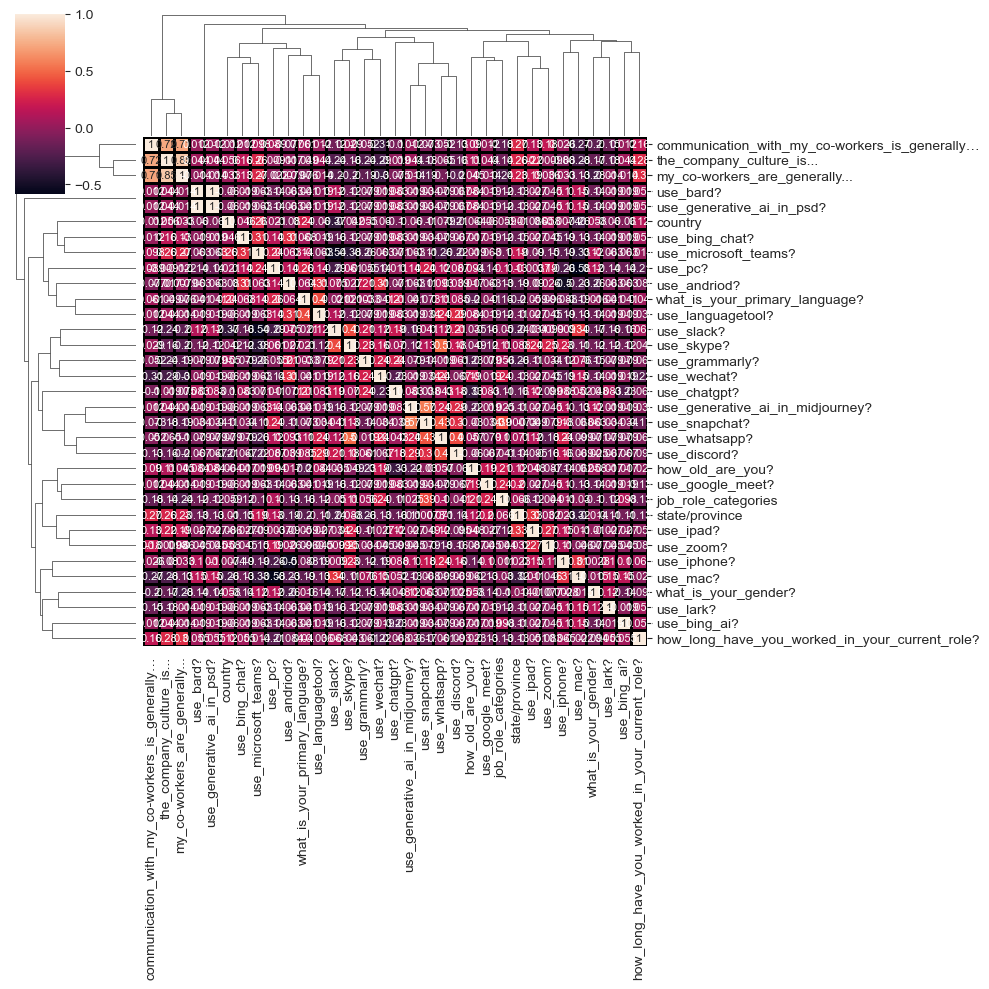

In [31]:
# Increase the figure size to make the chart wider
plt.figure(figsize=(14, 8))

# Generate the heatmap with correlation values and annotations
sns.clustermap(df.corr(numeric_only=True), annot=True, annot_kws={"fontsize": 8}, linecolor='black', linewidths=1)

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation=90)
plt.show()

<Figure size 1400x800 with 0 Axes>

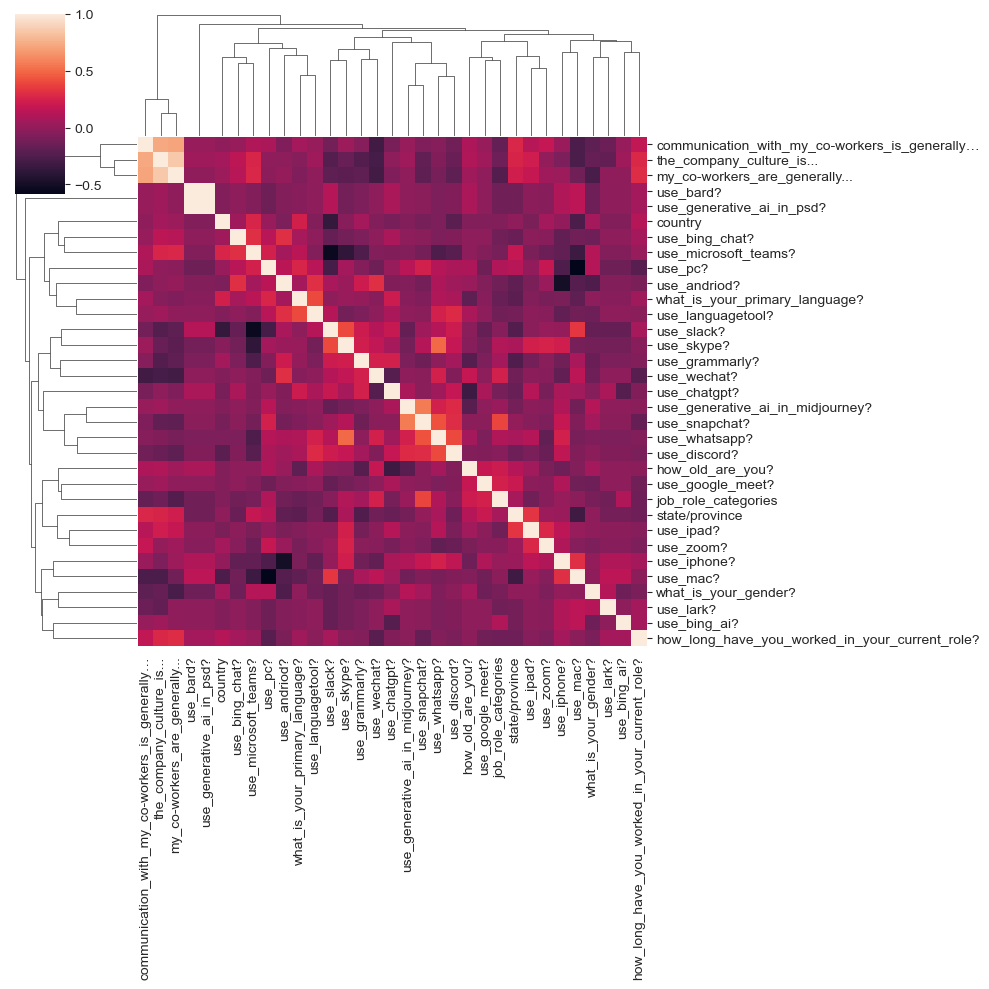

In [32]:
# Increase the figure size to make the chart wider
plt.figure(figsize=(14, 8))

# Generate the heatmap with correlation values and annotations
sns.clustermap(df.corr(numeric_only=True), annot=False, linecolor=None, linewidths=0)

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation=90)
plt.show()

<Figure size 1400x800 with 0 Axes>

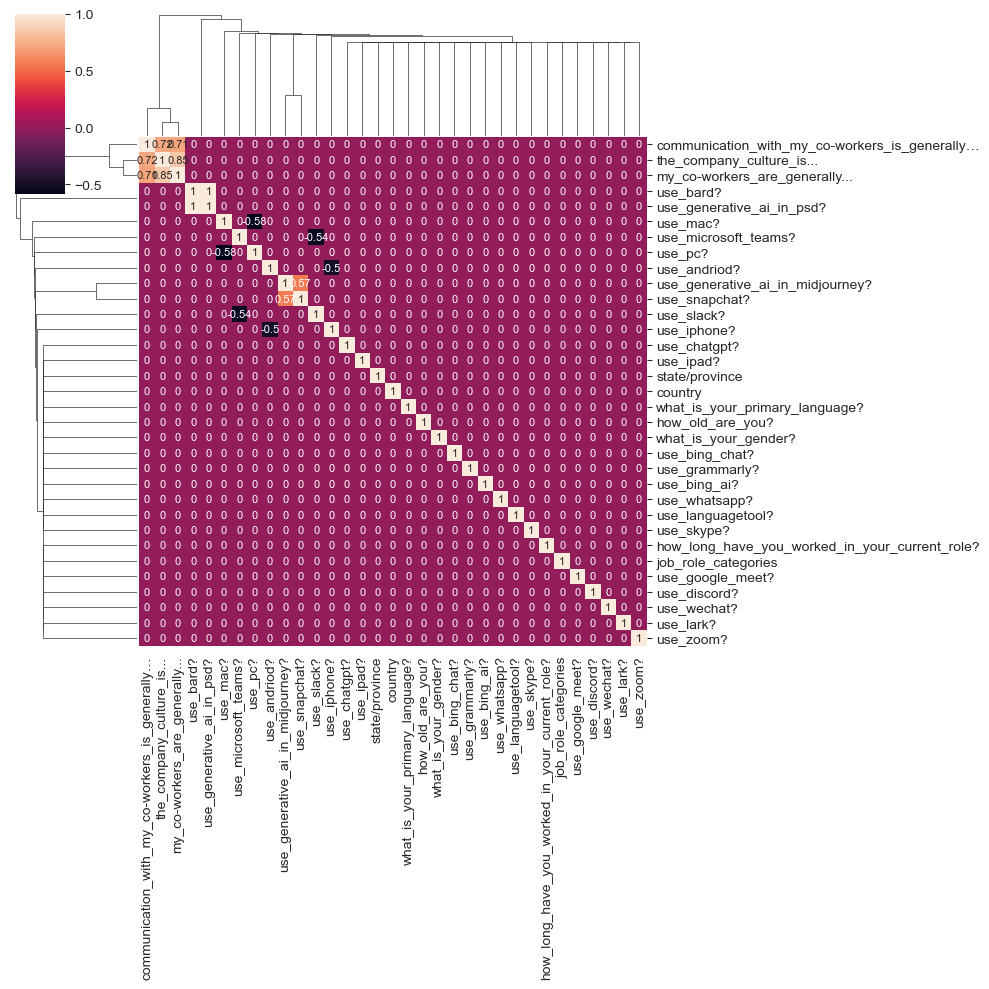

In [33]:
# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Replace infinite and NaN values with zeros
correlation_matrix.replace([np.inf, -np.inf, np.nan], 0, inplace=True)

# Filter the correlation matrix to keep only values >= 0.5 or <= -0.5
filtered_corr_matrix = correlation_matrix[(correlation_matrix >= 0.5) | (correlation_matrix <= -0.5)]

# Replace non-finite values with zeros in the filtered correlation matrix
filtered_corr_matrix.replace([np.inf, -np.inf, np.nan], 0, inplace=True)

# Increase the figure size to make the chart wider
plt.figure(figsize=(14, 8))

# Generate the heatmap with filtered correlation values and annotations
sns.clustermap(filtered_corr_matrix, annot=True, annot_kws={"fontsize": 8}, linecolor='black', linewidths=0)

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation=90)
plt.show()

<Figure size 1400x800 with 0 Axes>

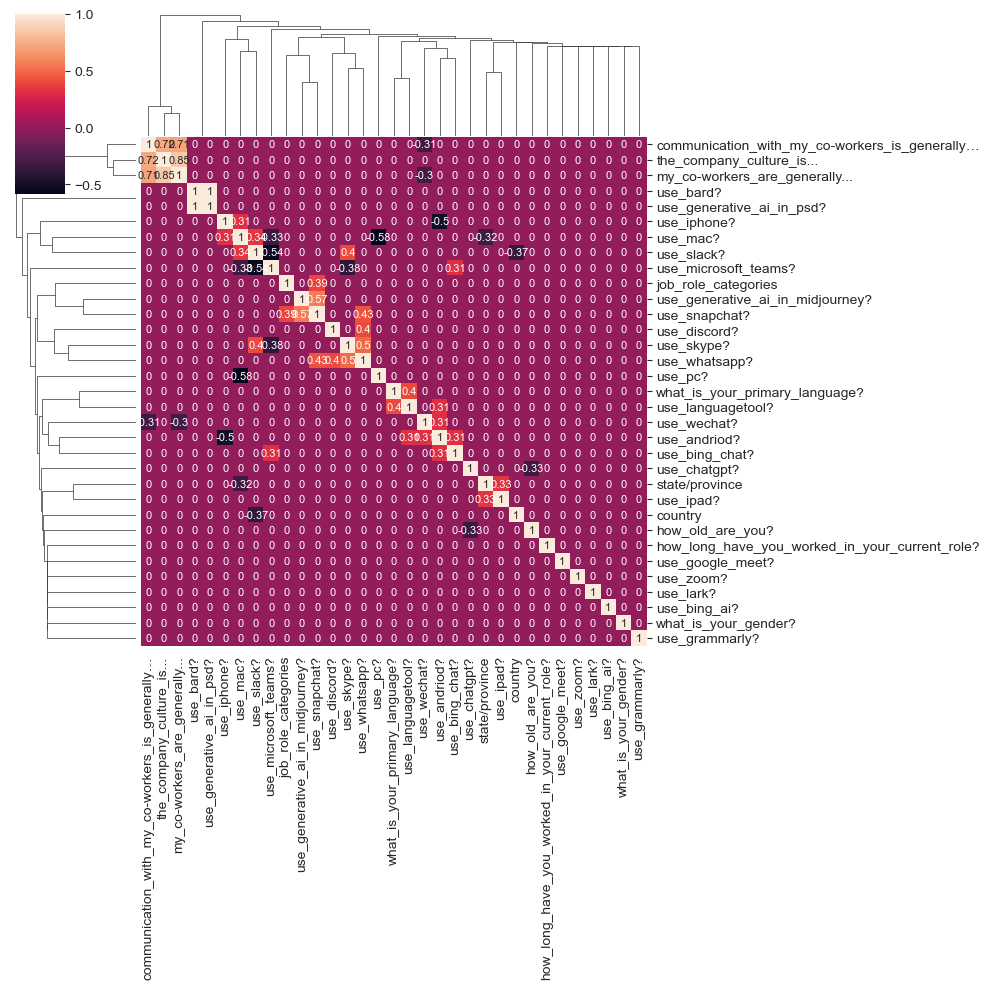

In [34]:
# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Replace infinite and NaN values with zeros
correlation_matrix.replace([np.inf, -np.inf, np.nan], 0, inplace=True)

# Filter the correlation matrix to keep only values >= 0.3 or <= -0.3
filtered_corr_matrix = correlation_matrix[(correlation_matrix >= 0.3) | (correlation_matrix <= -0.3)]

# Replace non-finite values with zeros in the filtered correlation matrix
filtered_corr_matrix.replace([np.inf, -np.inf, np.nan], 0, inplace=True)

# Increase the figure size to make the chart wider
plt.figure(figsize=(14, 8))

# Generate the heatmap with filtered correlation values and annotations
sns.clustermap(filtered_corr_matrix, annot=True, annot_kws={"fontsize": 8}, linecolor='black', linewidths=0)

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation=90)
plt.show()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 38 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   how_old_are_you?                                                     53 non-null     int64 
 1   what_is_your_gender?                                                 53 non-null     int32 
 2   what_is_your_primary_language?                                       53 non-null     int32 
 3   country                                                              53 non-null     int32 
 4   city                                                                 50 non-null     object
 5   state/province                                                       53 non-null     int32 
 6   what_devices_do_you_use_regularly_at_work?_select_all_that_apply     53 non-null     object
 7   use_iphone?        

<Figure size 1000x800 with 0 Axes>

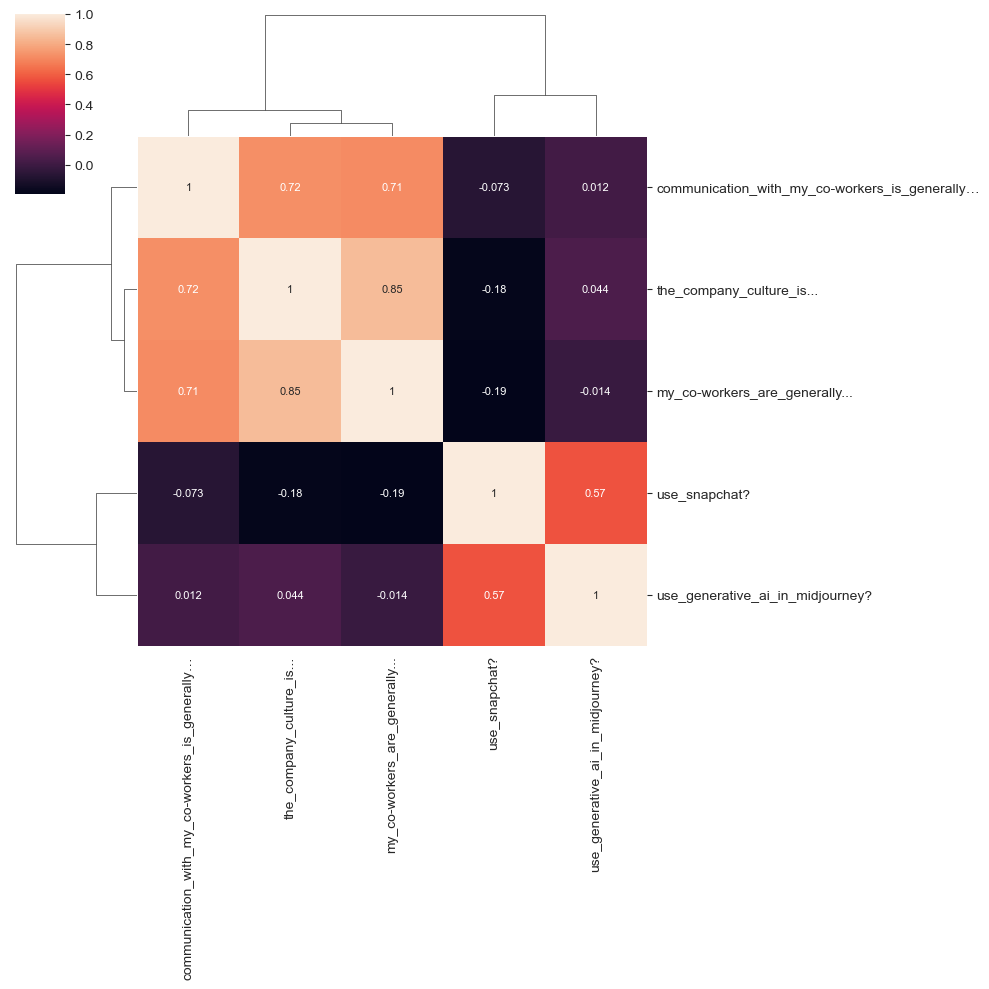

In [36]:
# Select the specified columns
selected_columns = [
    'communication_with_my_co-workers_is_generally…',
    'the_company_culture_is...',
    'my_co-workers_are_generally...',
    'use_snapchat?',
    'use_generative_ai_in_midjourney?'
]

# Filter the DataFrame to include only the selected columns
selected_df = df[selected_columns]

# Calculate the correlation matrix for the selected columns
correlation_matrix = selected_df.corr()

# Replace infinite and NaN values with zeros
correlation_matrix.replace([np.inf, -np.inf, np.nan], 0, inplace=True)

# Increase the figure size to make the chart wider
plt.figure(figsize=(10, 8))

# Generate the clustermap for the selected columns
sns.clustermap(correlation_matrix, annot=True, annot_kws={"fontsize": 8}, linecolor='black', linewidths=0)

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation=90)
plt.show()

In [37]:
# Save DataFrame to a CSV file
#df.to_csv('ai_survey_python.csv', index=False)